# Algorithmic Toolbox - Week 4 - Divide and Conquer

## 1.  Binary Search

In [1]:
%%writefile first.cpp
#include <bits/stdc++.h>
#include <cstdlib>

using namespace std;

int binary_search(const vector<int> &a, int x) {
    int left = 0;
    int right = a.size() - 1; 
    //write your code here
    while (left <= right) {
        int k = (left + right) / 2;
        if (a[k] == x)
            return k;
        if (a[k] < x)
            left = k + 1;
        if (a[k] > x)
            right = k - 1;
    }
    return -1;
}

int linear_search(const vector<int> &a, int x) {
    for (size_t i = 0; i < a.size(); ++i) {
        if (a[i] == x) return i;
    }
    return -1;
}

void stress_test() {
    while(true) {
        int n = rand() % 100 + 100;
        vector<int> numbers(n);
        int element = 0;
        for (int i = 0; i < n; i++) {
            element = rand() % 100 + 1;
            numbers[i] = element;
        }
        sort(numbers.begin(), numbers.end());
        int k = rand() % 100 + 10;
        vector<int> s(k);
        for (int i = 0; i < k; i++) {
            element = rand() % 100 + 1;
            s[i] = element;
        }
        int res1 = -1;
        int res2 = -1;
        bool diff = true;
        for (int i = 0; i < k; i++) {
            res1 = binary_search(numbers, s[i]);
            res2 = linear_search(numbers, s[i]);
            diff = res1 == res2;
            if (!diff) {
                for (int j = 0; j < n; j++) {
                    cout << numbers[j] << " ";
                }
                cout << '\n';
                cout << "Wrong answer\n";
                cout << "Element: " << s[i] << '\n';
                cout << "BS: " << res1 << ", " << "LS: " << res2 << '\n';
                break;
            }
            cout << "OK\n";
        }
        if (!diff)
            break;
    }
}

int main() {
    int n = 0;
    cin >> n;
    vector<int> a(n);
    for (int i = 0; i < a.size(); i++) {
        cin >> a[i];
    }
    int m = 0;
    cin >> m;
    vector<int> b(m);
    for (int i = 0; i < m; ++i) {
        cin >> b[i];
    }
    for (int i = 0; i < m; ++i) {
        //replace with the call to binary_search when implemented
        cout << binary_search(a, b[i]) << ' ';
    }
    cout << '\n';
    //stress_test();
    return 0;
}

Writing first.cpp


## 2. Majority Element

In [2]:
%%writefile second.cpp
#include <bits/stdc++.h>

using namespace std;

int get_majority_element(vector<int> &a, int left, int right) {
    if (left == right) return -1;
    if (left + 1 == right) return a[left];
    //write your code here
    int m = (left + right) / 2;
    int a1 = get_majority_element(a, left, m);
    int a2 = get_majority_element(a, m, right);
    if (a1 == a2) {
        return a1;
    }
    int count1 = 0, count2 = 0;
    for (int i = left; i < right; i++) {
        if (a[i] == a1)
            count1++;
        if (a[i] == a2)
            count2++;
    }
    if (count1 > count2 && count1 > (right - left) / 2)
        return a1;
    if (count2 > count1 && count2 > (right - left) / 2)
        return a2;
    return -1;
}

int main() {
    int n = 0;
    cin >> n;
    vector<int> a(n);
    for (size_t i = 0; i < a.size(); ++i) {
        cin >> a[i];
    }
    cout << (get_majority_element(a, 0, a.size()) != -1) << '\n';
    return 0;
}

Writing second.cpp


## 3. Improving Quick Sort

In [3]:
%%writefile third.cpp
#include <bits/stdc++.h>
#include <cstdlib>

using namespace std;

int partition2(vector<int> &a, int l, int r) {
    int x = a[l];
    int j = l;
    for (int i = l + 1; i <= r; i++) {
        if (a[i] <= x) {
            j++;
            swap(a[i], a[j]);
        }
    }
    swap(a[l], a[j]);
    return j;
}

pair<int, int> partition(vector<int> &a, int left, int right) {
    int x = a[left];
    int k = left;
    for (int i = left + 1; i <= right; i++) {
        if (a[i] == x) {
            k++;
            swap(a[k], a[i]);
        }
    }
    int j = k;
    int aux = left;
    for (int i = k + 1; i <= right; i++) {
        if (a[i] < x) {
            j++;
            swap(a[j], a[i]);
            swap(a[j], a[aux]);
            aux++;
        }
    }
    return {aux, k};
}

pair<int, int> partition3(vector<int> &a, int left, int right) {
    int x = a[left];
    int j = left;
    int aux = left - 1;
    for (int i = left + 1; i <= right; i++) {
        if (a[i] == x) {
            j++;
            swap(a[i], a[j]);
        } else if(a[i] < x) {
            j++;
            aux++;
            swap(a[i], a[j]);
            swap(a[j], a[aux]);
        }
    }
    if (aux < left)
        aux = left;
    return {aux, j};
}

void randomized_quick_sort(vector<int> &a, int l, int r) {
    if (l >= r) {
        return;
    }

    int k = l + rand() % (r - l + 1);
    swap(a[l], a[k]);
    pair<int, int> m = partition3(a, l, r);
    int m1 = m.first;
    int m2 = m.second;

    randomized_quick_sort(a, l, m1);
    randomized_quick_sort(a, m2 + 1, r);
}

bool compare(vector<int> &a, vector<int> &b) {
    int n = a.size();
    for (int i = 0; i < n; i++) {
        if (a[i] != b[i])
            return false;
    }
    return true;
}

void stress_test() {
    while (true) {
        int n = rand() % 10 + 5;
        vector<int> numbers;
        vector<int> test;
        int element;
        for (int i = 0; i < n; i++) {
            element = rand() % 5 + 1;
            numbers.push_back(element);
            test.push_back(element);
        }
        cout << "Array:\n";
        for (int i = 0; i < n; i++) {
            cout << numbers[i] << " ";
        }
        cout << '\n';
        randomized_quick_sort(numbers, 0, n - 1);
        sort(test.begin(), test.end());
        for (const auto &x : numbers) {
            cout << x << " ";
        }
        cout << '\n';
        for (const auto &x : test) {
            cout << x << " ";
        }
        cout << '\n';
        bool res = compare(numbers, test);
        if (res) {
            cout << "OK\n\n";
        } else {
            cout << "Wrong answer\n";
            break;
        }
    }
}

int main() {
    //stress_test();
    int n = 0;
    cin >> n;
    vector<int> a(n);
    for (int i = 0; i < a.size(); ++i) {
        cin >> a[i];
    }
    randomized_quick_sort(a, 0, a.size() - 1);
    for (int i = 0; i < a.size(); ++i) {
        cout << a[i] << ' ';
    }
    cout << '\n';
    return 0;
}

Writing third.cpp


## 4. Number of Inversions

In [4]:
%%writefile fourth.cpp
#include <bits/stdc++.h>
#include <cstdlib>

using namespace std;

void print_vector(const vector<int> &elements) {
    for (auto element : elements)
        cout << element << " ";
    cout << '\n';
}

vector<int> subarr(vector<int> &A, int left, int right) {
    vector<int> res;
    for (int i = left; i <= right; i++) {
        res.push_back(A[i]);
    }
    return res;
}

vector<int> merge(vector<int> &B, vector<int> &C) {
    int index_b = 0;
    int index_c = 0;
    vector<int> D;
    while(index_b < B.size() && index_c < B.size()) {
        int b = B[index_b];
        int c = C[index_c];
        if (b <= c) {
            D.push_back(b);
            index_b++;
        } else {
            D.push_back(c);
            index_c++;
        }
    }
    while (index_b < B.size()) {
        int b = B[index_b];
        D.push_back(b);
        index_b++;
    }
    while (index_c < C.size()) {
        int c = C[index_c];
        D.push_back(c);
        index_c++;
    }
    return D;
}

int merge_sort(vector<int> &A) {
    if (A.size() == 1)
        return 0;
    int m = (A.size() - 1) / 2;
    vector<int> b = subarr(A, 0, m);
    vector<int> c = subarr(A, m + 1, A.size() - 1);
    int res = 0;
    for (int i = 0; i < b.size(); i++) {
        for (int j = 0; j < c.size(); j++) {
            if (b[i] > c[j])
                res++;
        }
    }
    return res + merge_sort(b) + merge_sort(c);
}

int naive_solution(const vector<int> &A) {
    int res = 0;
    int n = A.size();
    for (int i = 0; i < n - 1; i++) {
        for (int j = i + 1; j < n; j++) {
            if (A[i] > A[j])
                res++;
        }
    }
    return res;
}

void stress_test() {
    while(true) {
        int n = rand() % 10 + 6;
        vector<int> numbers(n);
        int element = -1;
        for (int i = 0; i < n; i++) {
            element = rand() % 10 + 1;
            numbers[i] = element;
            cout << element << " ";
        }
        cout << '\n';
        int res1 = naive_solution(numbers);
        int res2 = merge_sort(numbers);
        if (res1 != res2) {
            cout << "Wrong answer: " << res1 << " " << res2 << '\n';
            break;
        } else {
            cout << "0K\n";
        }
    }
}

int main() {
    int n = 0;
    cin >> n;
    vector<int> numbers(n);
    for (int i = 0; i < n; i++) {
        cin >> numbers[i];
    }
    int res = merge_sort(numbers);
    cout << res << '\n';
    //stress_test();
    return 0;
}

Writing fourth.cpp


## Veredict

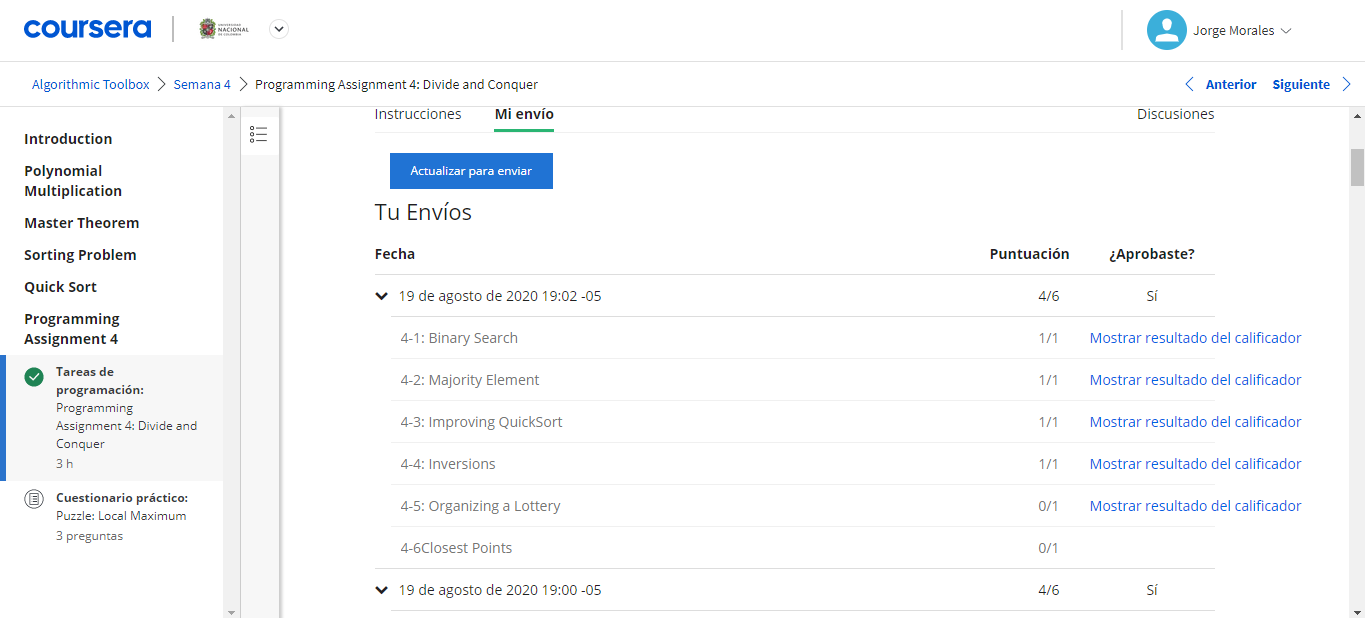